In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [45]:
df=pd.read_csv('/workspaces/ai_ml/health_ai/Health_data.csv', delimiter=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Independent variables (features)
X = df.drop('target', axis=1)
X_scaled = scaler.fit_transform(X)
# Dependent variable (target)
y = df['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:

# Define the parameter ranges
param_grid = {'C': [50, 100, 200,400],'gamma': [0.0001,0.00001,0.0000001],'kernel': ['rbf']} 

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the model to the data
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

# Make predictions with the optimized model
grid_predictions = grid.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.771 total time=   0.0s
[CV 5/5] END ....C=50, gamma=0.0001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END .....C=50, gamma=1e-05, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=50, gamma=1e-07, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=50, gamma=1e-07, kernel=rbf;

In [ ]:
# Get the best parameters
best_params = grid.best_params_

# Create a new SVC model with the best parameters
best_model = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions with the optimized model
best_model_predictions = best_model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, best_model_predictions))

Accuracy: 0.8852459016393442


In [44]:
scores = cross_val_score(best_model, X, y, cv=7)

# Print the scores
print("Cross-validation scores:", scores)

# Print the mean score
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.81818182 0.79545455 0.88372093 0.76744186 0.79069767 0.72093023
 0.76744186]
Mean cross-validation score: 0.791981274539414


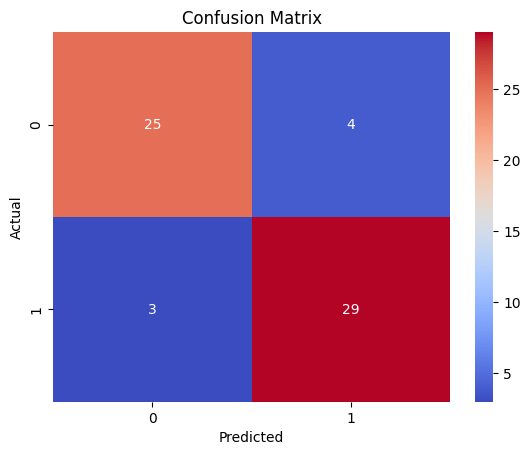

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid_predictions)
# Draw a heatmap with the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8032786885245902


In [52]:

# Define parameter grid
param_distributions = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "n_estimators":[10, 100, 200]
}

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=40, cv=3, random_state=42, n_jobs=-1)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.31818181818181823, 'max_depth': 8, 'learning_rate': 0.1}
Best score found:  0.8265432098765432


In [55]:
# Get the best parameters
best_params = random_search.best_params_

# Create a new GradientBoostingClassifier with the best parameters
clf_best = GradientBoostingClassifier(**best_params)

# Train the new model
clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_best.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8524590163934426


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Create a Sequential model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

# Add the first layer with 32 nodes and 'relu' activation function
model.add(Dense(32, activation='tanh', input_shape=(X_train.shape[1],)))

# Add the second layer with 16 nodes and 'relu' activation function
model.add(Dense(16, activation='tanh'))

# Add the output layer with 'softmax' activation function
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print("Accuracy: ", accuracy)

Epoch 1/10


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7004 - loss: 0.5705  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4866 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.4713 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4261 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8530 - loss: 0.3858 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.3808 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.3889 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8503 - loss: 0.3577 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3795 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3635 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3470  
Accuracy:  0.8852459192276001
